# Install and Import property

In [1]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Making key point using Open CV

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [ ]:
mp_holistic??

In [6]:
def draw_styled_landmarks(image, results):

    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
cv2.cvtColor??

In [ ]:
draw_landmarks(frame, results)

In [ ]:
mp.python.solutions.holistic?

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract keypoint

In [ ]:
len(results.left_hand_landmarks.landmark)

In [ ]:
results.left_hand_landmarks.landmark[0]

In [ ]:
len(results.face_landmarks.landmark)

In [ ]:
results.face_landmarks.landmark[0]

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

# Setup Folders for Collection

In [47]:
# Path for exported data, numpy arrays

DATA_PATH = os.path.join('C:\\Users\\alpian\\taSignLanguage','MP_Data_kota_whface')

# Actions that we try to detect
actions = np.array(['maaf','tolong', 'terimakasih'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [48]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [49]:
pwd

'C:\\Users\\alpian\\taSignLanguage'

# Collect Keypoint Values for Training and Testing

In [52]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions

#     # Loop through sequences aka videos
#     for sequence in range(no_sequences):
#         # Loop through video length aka sequence length
#         for frame_num in range(sequence_length):

#             # Read feed
#             ret, frame = cap.read()

#             # Make detections
#             image, results = mediapipe_detection(frame, holistic)
# #                 print(results)

#             # Draw landmarks
#             draw_styled_landmarks(image, results)

#             # NEW Apply wait logic
#             if frame_num == 0: 
#                 cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                 cv2.putText(image, 'Collecting frames for {} Video Number {}'.format('terimakasih', sequence), (15,12), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                 # Show to screen
#                 cv2.imshow('OpenCV Feed', image)
#                 cv2.waitKey(2000)
#             else: 
#                 cv2.putText(image, 'Collecting frames for {} Video Number {}'.format('terimakasih', sequence), (15,12), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                 # Show to screen
#                 cv2.imshow('OpenCV Feed', image)

#             # NEW Export keypoints
#             keypoints = extract_keypoints(results)
#             npy_path = os.path.join(DATA_PATH,'terimakasih' , str(sequence), str(frame_num))
#             np.save(npy_path, keypoints)

#             # Break gracefully
#             if cv2.waitKey(10) & 0xFF == ord('q'):
#                 break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [53]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [54]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [55]:
label_map = {label:num for num, label in enumerate(actions)}

In [56]:
label_map

{'maaf': 0, 'tolong': 1, 'terimakasih': 2}

In [58]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [59]:
np.array(sequences).shape

(90, 30, 258)

In [60]:
X = np.array(sequences)

In [61]:
y = to_categorical(labels).astype(int)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and Train LSTM Neural Network

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [64]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [70]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [71]:
# filepath = 'my_best_model.hdf5'
# checkpoint = ModelCheckpoint(filepath=filepath, 
#                              monitor='val_loss',
#                              verbose=1, 
#                              save_best_only=True,
#                              mode='min')
# callbacks = [checkpoint]

In [72]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
# history = model.fit(X_train, y_train, epochs=500, callbacks=callbacks,validation_data=(X_test,y_test))

In [74]:
history = model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback], validation_data=(X_test,y_test))

Epoch 1/200
3/3 [==============================] - 7s 458ms/step - loss: 1.1052 - accuracy: 0.2917 - val_loss: 1.0813 - val_accuracy: 0.4444
Epoch 2/200
3/3 [==============================] - 0s 56ms/step - loss: 1.0858 - accuracy: 0.4722 - val_loss: 1.0610 - val_accuracy: 0.5556
Epoch 3/200
3/3 [==============================] - 0s 56ms/step - loss: 0.9645 - accuracy: 0.4583 - val_loss: 0.9132 - val_accuracy: 0.2222
Epoch 4/200
3/3 [==============================] - 0s 58ms/step - loss: 0.7266 - accuracy: 0.5139 - val_loss: 0.8197 - val_accuracy: 0.6667
Epoch 5/200
3/3 [==============================] - 0s 53ms/step - loss: 0.6739 - accuracy: 0.6667 - val_loss: 0.7641 - val_accuracy: 0.6667
Epoch 6/200
3/3 [==============================] - 0s 55ms/step - loss: 0.6259 - accuracy: 0.6667 - val_loss: 0.5945 - val_accuracy: 0.6667
Epoch 7/200
3/3 [==============================] - 0s 56ms/step - loss: 0.5602 - accuracy: 0.6667 - val_loss: 0.5024 - val_accuracy: 0.6667
Epoch 8/200
3/3 [==

Epoch 59/200
3/3 [==============================] - 0s 55ms/step - loss: 3.8154 - accuracy: 0.4861 - val_loss: 8.4308 - val_accuracy: 0.3333
Epoch 60/200
3/3 [==============================] - 0s 56ms/step - loss: 8.1366 - accuracy: 0.3889 - val_loss: 4.0346 - val_accuracy: 0.3333
Epoch 61/200
3/3 [==============================] - 0s 56ms/step - loss: 3.8599 - accuracy: 0.3750 - val_loss: 5.2046 - val_accuracy: 0.3889
Epoch 62/200
3/3 [==============================] - 0s 59ms/step - loss: 5.4156 - accuracy: 0.4861 - val_loss: 7.2835 - val_accuracy: 0.2222
Epoch 63/200
3/3 [==============================] - 0s 57ms/step - loss: 4.2238 - accuracy: 0.2778 - val_loss: 3.3997 - val_accuracy: 0.2222
Epoch 64/200
3/3 [==============================] - 0s 54ms/step - loss: 5.1342 - accuracy: 0.2639 - val_loss: 5.6781 - val_accuracy: 0.2222
Epoch 65/200
3/3 [==============================] - 0s 55ms/step - loss: 4.8411 - accuracy: 0.3333 - val_loss: 1.1915 - val_accuracy: 0.5556
Epoch 66/200


Epoch 117/200
3/3 [==============================] - 0s 55ms/step - loss: 0.3375 - accuracy: 0.7917 - val_loss: 0.2329 - val_accuracy: 0.8333
Epoch 118/200
3/3 [==============================] - 0s 54ms/step - loss: 0.2504 - accuracy: 0.8611 - val_loss: 0.3814 - val_accuracy: 0.7778
Epoch 119/200
3/3 [==============================] - 0s 53ms/step - loss: 0.2049 - accuracy: 0.9167 - val_loss: 0.7226 - val_accuracy: 0.6667
Epoch 120/200
3/3 [==============================] - 0s 52ms/step - loss: 0.3517 - accuracy: 0.8056 - val_loss: 0.3661 - val_accuracy: 0.8333
Epoch 121/200
3/3 [==============================] - 0s 55ms/step - loss: 0.2692 - accuracy: 0.8750 - val_loss: 0.2043 - val_accuracy: 0.9444
Epoch 122/200
3/3 [==============================] - 0s 55ms/step - loss: 0.1698 - accuracy: 0.9444 - val_loss: 0.3426 - val_accuracy: 0.8889
Epoch 123/200
3/3 [==============================] - 0s 54ms/step - loss: 0.5000 - accuracy: 0.8750 - val_loss: 8.1361 - val_accuracy: 0.4444
Epoch 

Epoch 175/200
3/3 [==============================] - 0s 54ms/step - loss: 0.2363 - accuracy: 0.8889 - val_loss: 0.3084 - val_accuracy: 0.8889
Epoch 176/200
3/3 [==============================] - 0s 54ms/step - loss: 0.2432 - accuracy: 0.9167 - val_loss: 0.1932 - val_accuracy: 0.9444
Epoch 177/200
3/3 [==============================] - 0s 55ms/step - loss: 0.1133 - accuracy: 0.9722 - val_loss: 0.1816 - val_accuracy: 0.9444
Epoch 178/200
3/3 [==============================] - 0s 54ms/step - loss: 0.1141 - accuracy: 0.9722 - val_loss: 0.1873 - val_accuracy: 0.9444
Epoch 179/200
3/3 [==============================] - 0s 59ms/step - loss: 0.1130 - accuracy: 0.9722 - val_loss: 0.1710 - val_accuracy: 0.8889
Epoch 180/200
3/3 [==============================] - 0s 57ms/step - loss: 0.1421 - accuracy: 0.9306 - val_loss: 0.1957 - val_accuracy: 0.9444
Epoch 181/200
3/3 [==============================] - 0s 53ms/step - loss: 0.1175 - accuracy: 0.9583 - val_loss: 0.1727 - val_accuracy: 0.8889
Epoch 

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            82688     
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 237,251
Trainable params: 237,251
Non-tr

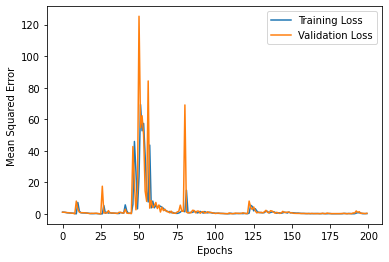

In [76]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig('model_training_history')
plt.show()

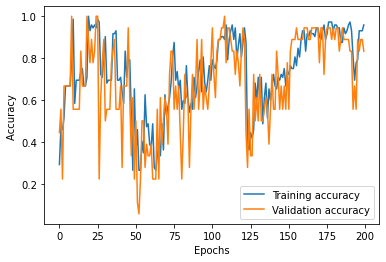

In [77]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy ')
plt.savefig('model_training_history_accuracy')
plt.show()

# Make Predictions

In [78]:
res = model.predict(X_test)

1/1 [==============================] - 1s 545ms/step


In [79]:
actions[np.argmax(res[1])]

'tolong'

In [80]:
actions[np.argmax(y_test[1])]

'tolong'

# Save Weights

In [ ]:
model.save('signLWithoutFace.h5')

In [ ]:
model.load_weights('signLWithoutFace.h5')

# Evaluation using Confusion Matrix and Accuracy

In [81]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [82]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [83]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [84]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 9,  3],
        [ 0,  6]],

       [[14,  0],
        [ 0,  4]],

       [[10,  0],
        [ 3,  5]]], dtype=int64)

In [85]:
accuracy_score(ytrue, yhat)

0.8333333333333334

# Test in Real Time

In [86]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [89]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.87

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 3: 
                sentence = sentence[-3:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 24ms/step
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
maaf
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()